In [1]:
import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../workers/Imports.ipynb")

//anaconda/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
//anaconda/lib/python2.7/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


Populating the interactive namespace from numpy and matplotlib


### Import data

In [2]:
# extract from all files
practice_files = [x for x in os.listdir('../../raw_data/by_month/')]
dfs = []
for practice_file in practice_files:
    print practice_file
    if practice_file in ['Aug2017Shots.csv', 'Oct2017Shots.csv', 'Sept2017Shots.csv']:
         tmp = pd.read_csv('../../raw_data/by_month/{0}'.format(practice_file))
    else:
        tmp = pd.read_csv('../../raw_data/by_month/{0}'.format(practice_file), sep='\t')
    dfs.append(tmp)
df = pd.concat(dfs)
df = add_columns(df)

Apr2017Shots.csv
Aug2017Shots.csv


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dec2016Shots.csv


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,14,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Feb2017Shots.csv
Jan2017Shots.csv


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Jul2017Shots.csv
Jun2017Shots.csv
Mar2017Shots.csv
May2017Shots.csv


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,14,22,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Nov2016Shots.csv
Oct2017Shots.csv


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Sept2017Shots.csv


In [3]:
# Remove any shots without attributes
df = df[(df.angle != 0)]

In [10]:
len(df)

21238202

In [11]:
def make_miss_to_int(x):
    if x == True:
        return 1
    else:
        return 0
df['make_miss_int'] = df['make_miss'].apply(make_miss_to_int)
green_palette = sns.color_palette("RdYlGn", 102)
def map_percentage_to_color(x):
    return green_palette[int(100*x)]

### Parse data

For court maps

In [241]:
matrix_percentage, matrix_count, matrix_lr, matrix_angle, matrix_depth = [], [], [], [], []
for y_min, y_max in zip(np.arange(-50, 294, 6), np.arange(-44, 300, 6)):
    print y_min, y_max
    array_percentage, array_count, array_lr, array_angle, array_depth = [], [], [], [], []
    for x_min, x_max in zip(np.arange(-250, 244, 6), np.arange(-244, 250, 6)):
        df_ = df[(df.floor_position_x_inch > x_min)&(df.floor_position_x_inch <= x_max)&
                     (df.floor_position_y_inch > y_min)&(df.floor_position_y_inch <= y_max)]
        if len(df_) > 10:
            array_percentage.extend([df_['numeric_make_miss'].mean()]*6)
            array_lr.extend([df_['left_right'].mean()]*6)
            array_angle.extend([df_['angle'].mean()]*6)
            array_depth.extend([df_['depth'].mean()]*6)
        else:
            array_percentage.extend([np.nan]*6)
            array_lr.extend([np.nan]*6)
            array_angle.extend([np.nan]*6)
            array_depth.extend([np.nan]*6)
    for i in range(6):
        matrix_percentage.append(array_percentage[::-1])
        matrix_lr.append(array_lr[::-1])
        matrix_angle.append(array_angle[::-1])
        matrix_depth.append(array_depth[::-1])

-50 -44
-44 -38
-38 -32
-32 -26
-26 -20
-20 -14
-14 -8
-8 -2
-2 4
4 10
10 16
16 22
22 28
28 34
34 40
40 46
46 52
52 58
58 64
64 70
70 76
76 82
82 88
88 94
94 100
100 106
106 112
112 118
118 124
124 130
130 136
136 142
142 148
148 154
154 160
160 166
166 172
172 178
178 184
184 190
190 196
196 202
202 208
208 214
214 220
220 226
226 232
232 238
238 244
244 250
250 256
256 262
262 268
268 274
274 280
280 286
286 292
292 298


In [242]:
# Export to pickles
pickle.dump( matrix_lr, open( "../../processed_data/matrix.lr.mean.p", "wb" ) )
pickle.dump( matrix_angle, open( "../../processed_data/matrix.angle.mean.p", "wb" ) )
pickle.dump( matrix_depth, open( "../../processed_data/matrix.depth.mean.p", "wb" ) )

### Plotting court positions

In [4]:
matrix_lr = pickle.load( open( "../../processed_data/matrix.lr.p", "rb" ) )
matrix_angle = pickle.load( open( "../../processed_data/matrix.angle.p", "rb" ) )
matrix_depth = pickle.load( open( "../../processed_data/matrix.depth.p", "rb" ) )

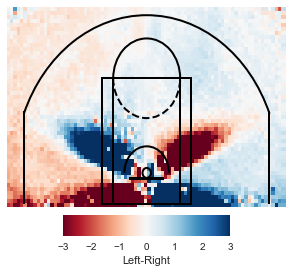

In [6]:
# correct porportions
fig = plt.figure(figsize=(5,4.5))
ax = fig.add_subplot(111)
sns.heatmap(matrix_lr[::-1], vmin=-3, vmax=3, xticklabels=[], yticklabels=[], cmap="RdBu",
            cbar_kws={"shrink": 0.6, "aspect": 8, "orientation": "horizontal","pad":-0.10, 
                      "label": 'Left-Right'})
draw_court(outer_lines=False)
plt.xlim(0,500)
plt.ylim(-50,300)
#plt.title('Left-Right')

plt.savefig('../../figures/court_floor.lr.median.pdf')
plt.show()

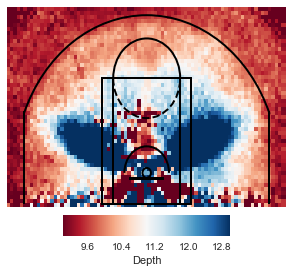

In [7]:
fig = plt.figure(figsize=(5,4.5))
ax = fig.add_subplot(111)
g = sns.heatmap(matrix_depth[::-1], vmin=9, vmax=13, xticklabels=[], yticklabels=[], cmap="RdBu",
            cbar_kws={"shrink": 0.6, "aspect": 8, "orientation": "horizontal", "pad":-0.10, 
                      "label": 'Depth'})
draw_court(outer_lines=False)
plt.xlim(0,500)
plt.ylim(-50,300)
#plt.title('Depth')
plt.savefig('../../figures/court_floor.depth.median.pdf')
plt.show()

### Plotting shooting percentages

In [12]:
df_not_bank = df[~df.is_bank_shot]

In [14]:
depth_order = [str(x) for x in np.arange(0, 22, 0.5)]

In [20]:
# Export shot data for percentage loss notebook
for min, max in zip([15, 18, 21, 24, 27], [18, 21, 24, 27, 30]):
    df_ = df_not_bank[(df_not_bank.shot_distance > min)&(df_not_bank.shot_distance < max)&
                     (df_not_bank.floor_position_x_feet < 8)&(df_not_bank.floor_position_x_feet > -8)]
    df_.to_csv('../../processed_data/shot_distance.{0}_{1}.csv'.format(min, max))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


15 18 10.1388264753 10.1152519821
18 21 9.69230680835 9.64232160904
21 24 9.20568416697 9.04776147683
24 27 9.03764757162 8.84281470782
27 30 8.22650068431 7.77322864593


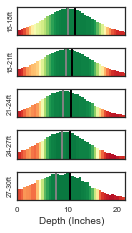

In [23]:
import matplotlib.patches as patches
sns.set_style("white")

f, axarr = plt.subplots(5, 1, sharex=True, sharey=True, figsize=( 2, 3.4))
f.tight_layout()

count_plot, count = 0, 0
for min, max in zip([15, 18, 21, 24, 27], [18, 21, 24, 27, 30]):
    
    ax = plt.subplot(5, 1, count_plot+1)
    #df_ = df[(df.shot_distance > min)&(df.shot_distance <= max)]
    df_ = df_straight_not_bank[(df_straight_not_bank.shot_distance > min)&(df_straight_not_bank.shot_distance <= max)]
    df_['depth_rounded'] = df_['depth'].apply(round_half)
    
    #print min, max
    median = df_['depth'].median()
    mean = np.mean([float(x) for x in df_['depth']])
    print min, max, median, mean
    depth_perc_df = df_[['depth_rounded', 'make_miss_int']].groupby('depth_rounded').mean().reset_index()
    depth_perc_df['sp_color'] = depth_perc_df['make_miss_int'].apply(map_percentage_to_color)
    depth_perc_df['depth_rounded'] = pd.Categorical(depth_perc_df.depth_rounded, depth_order)
    depth_perc_df = depth_perc_df.sort_values('depth_rounded')
    shooting_percentage_order = depth_perc_df[depth_perc_df.depth_rounded.isin(depth_order)].sp_color
    middle_of_gmz = (depth_perc_df[depth_perc_df.make_miss_int > 0.95].dropna().depth_rounded.astype(float).min() + depth_perc_df[depth_perc_df.make_miss_int > 0.95].dropna().depth_rounded.astype(float).max()) / 2
    s = list(df_.depth_rounded.value_counts()[depth_order])
    bar_locations = np.arange(0, 22, 0.5)
    ax.bar(bar_locations, s, width=0.5, color = shooting_percentage_order)
    plt.xlim(bar_locations[0], bar_locations[-1])
    plt.axvline(mean, c='0.5', lw=2)
    plt.axvline(middle_of_gmz, c='k', lw=2)

    plt.yticks([])
    plt.ylabel('{0}-{1}ft'.format(min,max), fontsize=7)
    #plt.axvline(x=11, c='k', lw=2)
    if ax.is_last_row():
        plt.xlabel('Depth (Inches)', fontsize=10)
        plt.xticks(fontsize=8)
    else:
        plt.xticks([])
    count_plot += 1
    plt.tight_layout()
    
    count +=1
plt.savefig('../../figures/Depth.5_lengths.straight.pdf')

## Left-Right

In [2]:
left_right_order =  [str(x) for x in np.arange(-10, 10.5, 0.5)]

In [62]:
# Export corner shot data for percentage loss notebook
df_ = df[(((df.floor_position_x_feet > -25)&(df.floor_position_x_feet <= -22))|
         ((df.floor_position_x_feet > 22)&(df.floor_position_x_feet <= 25)))&
             (df.floor_position_y_feet > -4)&(df.floor_position_y_feet <= 0)]
df_.to_csv('../../processed_data/deep_corner.csv')

In [7]:
df = pd.read_csv('../../processed_data/deep_corner.csv', index_col=0)

In [8]:
# plot from spots
def get_attribute_distributions(x_min, x_max, y_min, y_max):
    df_ = df[(df.floor_position_x_feet > x_min)&(df.floor_position_x_feet <= x_max)&
             (df.floor_position_y_feet > y_min)&(df.floor_position_y_feet <= y_max)]

    df_['left_right_rounded'] = df_['left_right'].apply(round_half)

    median = df_.left_right_rounded.median()
    mean = np.mean([float(x) for x in df_.left_right_rounded])
    print median, mean
    
    sns.set_style("white")
    plt.figure(figsize=(1.5, 1.75))
    #plt.figure(figsize=(8, 10))
    ax = plt.subplot(1, 1, 1)
    left_right_perc_df = df_[['left_right_rounded', 'make_miss_int']].groupby('left_right_rounded').mean().reset_index()
    left_right_perc_df['sp_color'] = left_right_perc_df['make_miss_int'].apply(map_percentage_to_color)
    left_right_perc_df['left_right_rounded'] = pd.Categorical(left_right_perc_df.left_right_rounded, left_right_order)
    left_right_perc_df = left_right_perc_df.sort_values('left_right_rounded')
    shooting_percentage_order = left_right_perc_df[left_right_perc_df.left_right_rounded.isin(left_right_order)].sp_color
    s = list(df_.left_right_rounded.value_counts()[left_right_order])
    bar_locations = np.arange(-10,10.5,0.5)
    ax.bar(bar_locations, s, width=0.5, color = shooting_percentage_order)
    plt.axvline(mean, c='0.5', lw=2)
    plt.yticks([])
    plt.xlim(-10,10.5)
    plt.ylabel('Shots taken')
    #plt.xlabel('Left-Right')
    plt.axvline(x=0, lw=2, c='k')

    return plt, left_right_perc_df

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


-1.5 -2.36598384305


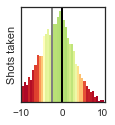

In [9]:
plt, right_corner_perc_df = get_attribute_distributions(22, 25, -4, -2)
#plt.xlabel('Right corner: Left-Right')
plt.savefig('../../figures/LR.right_corner.pdf')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.5 1.06603773585


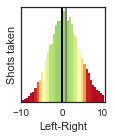

In [251]:
plt, left_corner_perc_df = get_attribute_distributions(-25, -22, -4, -2)
plt.xlabel('Left-Right')
plt.savefig('../../figures/LR.left_corner.pdf')